## Exercise 4: Correlations and Preprocessing


## Bushra Tariq Kiyani

Before we start applying machine learning algorithms, we want to have a look at further preprocessing and analyzing steps. To do so, this exercise will mainly deal with scaling, dimensionality reduction, correlation measures and the distribution of data points.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('fifa_20.csv')#Change path according to your files

### correlation vs. causality

A common step in data analytics is to investigate correlations between variables. Sometimes these correlations might or might not be derivable from obvious causalities. Create scatter plots of the feature pair 'goalkeeping_handling' and 'goalkeeping_positioning' and the feature pair 'height_cm' and 'gk_speed'. Do not forget to name the axes of the plots and add suitable titles.

In addition, calculate and print the Pearson correlation of each feature pair (you can also add the correlation to the title of the plot for a better overview). For calculation, use for example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

In [3]:
df['goalkeeping_handling'].max()

92

In [4]:
df['goalkeeping_positioning'].max()

91

Pearson correlation for Goalkeeping Handling and Goalkeeping Positioning pair is: 0.9705171659411664
Pearson correlation for Height(cm) and Goalkeeping speed pair is: -0.018339723523825267


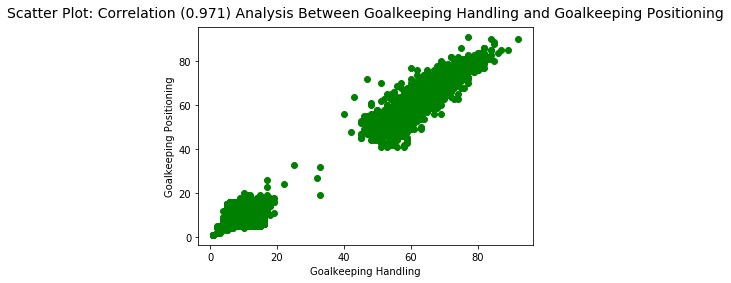

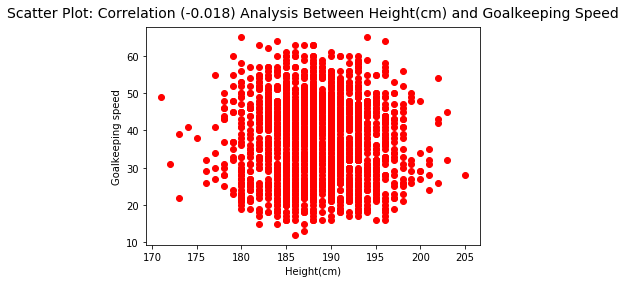

In [5]:
#TODO: Make scatter plots, calculate the Pearson correlation think about it.
# Pearson correlation
cor_gkHandling_gkPositioning = stats.pearsonr(df['goalkeeping_handling'], df['goalkeeping_positioning'])
print ("Pearson correlation for Goalkeeping Handling and Goalkeeping Positioning pair is:", str(cor_gkHandling_gkPositioning[0]))


cor_height_gkSpeed = df['height_cm'].corr(df['gk_speed'],method='pearson' )
print ("Pearson correlation for Height(cm) and Goalkeeping speed pair is:", str(cor_height_gkSpeed))


plt.title("Scatter Plot: Correlation ("+str((cor_gkHandling_gkPositioning[0]).round(3))+") Analysis Between Goalkeeping Handling and Goalkeeping Positioning" ,size = 14, pad = 10)
plt.xlabel("Goalkeeping Handling")
plt.ylabel("Goalkeeping Positioning")
plt.scatter(df['goalkeeping_handling'], df['goalkeeping_positioning'], c= "green")
plt.show()

plt.title("Scatter Plot: Correlation ("+str((cor_height_gkSpeed).round(3))+") Analysis Between Height(cm) and Goalkeeping Speed", size = 14, pad = 10)
plt.xlabel("Height(cm)")
plt.ylabel("Goalkeeping speed")
plt.scatter(df['height_cm'], df['gk_speed'], c = "red")
plt.show()



### investigate distributions

Create a histogram of the feature *defending* using 75 bins and the parameter *normed = True*. In addition, plot a normal distribution with the same mean and variance as line plot into the same diagram (it is recommended to use different colors).
For plotting the normal distribution you can use:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html

https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

What do you observe?

In [6]:
df['defending'].mean()

51.55350326314493

In [7]:
df['defending'].std()

16.419527611770175

In [8]:
df['defending'].value_counts()

63.0    570
61.0    523
65.0    515
64.0    514
60.0    511
       ... 
87.0      6
89.0      3
88.0      3
90.0      2
15.0      2
Name: defending, Length: 76, dtype: int64

In [9]:
mu = df['defending'].mean()
sigma = df['defending'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)


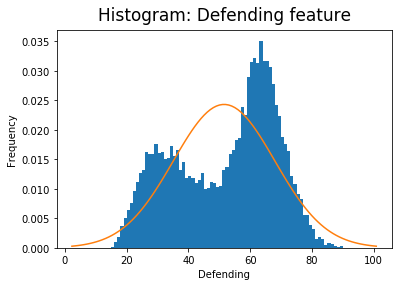

In [13]:
#TODO: Compute mean and standard deviation, plot both charts in one diagram, what can you see?
fig, ax = plt.subplots(figsize = (6,4))
defending = df["defending"]
plt.hist(defending, bins =75 , density =True)
plt.plot(x, norm.pdf(x, mu, sigma))
#defending.plot(kind = "kde", color = "orange")
# X #
ax.set_xlabel("Defending")
#ax.set_xlim(0, 100)
# Y #
#ax.set_ylim(0, .04)
ax.set_ylabel("Frequency")

# Overall #
ax.set_title("Histogram: Defending feature", size = 17, pad = 10)
plt.show()
